In [1]:
import pickle
import datetime
import matplotlib.pyplot as plt
'''Main'''
import numpy as np
import pandas as pd
'''Data Viz'''
import seaborn as sns
#plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['font.family'] = 'serif'
%matplotlib inline
'''Data Prep'''
from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
'''Metrics'''
from sklearn.metrics import log_loss, accuracy_score, f1_score, plot_roc_curve
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
'''Algos'''
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

In [2]:
outData = pd.read_csv('pct1_cal/modified_alter_alphas_066_labels_500.csv')
outData

,ticker,tradeDate,minute_new_FACTORS_CDPDP,minute_new_FACTORS_CDPP,minute_new_FACTORS_Down_beta,minute_new_FACTORS_ILLIQ,minute_new_FACTORS_IMI,minute_new_FACTORS_PVC,minute_new_FACTORS_TMA_turn,minute_new_FACTORS_TSMOM,...,alpha_27,alpha_11,alpha_42,alpha_12,alpha_1,alpha_23,alpha_5,alpha_9,alpha_31,openclose_pct1_rank
0,9,2017-01-03,-1.67800,2.17000,0.0000,-0.6160,0.00000,2.16800,0.5610,-0.5874,...,0.000000,0.000,0.00000,0.000000,0.000,0.0000,0.000,0.0,0.00000,0.79600
1,9,2017-01-04,-1.75100,1.93100,0.0000,-0.6333,0.00000,1.86700,0.6950,-1.0205,...,0.000000,0.000,0.00000,0.000000,0.000,0.0000,0.000,0.0,0.00000,0.18620
2,9,2017-01-05,0.03134,1.77200,0.0000,-0.6370,0.00000,1.69300,0.7090,-0.9440,...,0.000000,0.000,0.00000,0.000000,0.000,0.0000,0.000,0.0,0.00000,0.63600
3,9,2017-01-06,0.03049,1.54500,0.0000,-0.6210,0.00000,1.26900,0.6973,-0.9307,...,0.000000,0.000,0.00000,0.000000,0.000,0.0000,0.000,0.0,0.00000,0.68500
4,9,2017-01-09,0.02812,1.31600,0.0000,-0.6210,0.00000,1.14400,0.6840,-0.8955,...,0.000000,0.000,0.00000,0.000000,0.000,0.0000,0.000,0.0,0.00000,0.84900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569532,689009,2022-03-28,0.00000,-0.01237,0.1234,0.6150,-0.39500,0.04144,0.0000,1.4010,...,-0.040130,0.801,0.05090,-0.003868,1.634,2.1100,-1.128,0.0,0.06903,0.90870
569533,689009,2022-03-29,0.00000,0.12740,0.1430,0.6216,-0.00968,-0.03748,0.0000,0.3857,...,0.016000,1.004,0.05250,1.219000,1.524,-1.8730,-1.278,0.0,0.16270,0.02888
569534,689009,2022-03-30,0.00000,0.26700,0.1473,0.6133,-0.33890,0.03766,0.0000,-0.8643,...,0.015495,1.087,0.05017,-1.569000,-1.789,-0.1162,-1.292,0.0,0.15370,0.34350
569535,689009,2022-03-31,0.00000,-0.41600,0.5635,0.6060,-0.22190,-0.28420,0.0000,-0.8965,...,0.080440,1.003,0.05070,1.229500,-1.687,2.1350,-1.350,0.0,0.18120,0.27600


In [3]:
data = outData[outData.ticker == 9]
data['tradeDate'] = pd.to_datetime(data['tradeDate'], format = '%Y-%m-%d')
data

/workspace1/liufengyuan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ticker,tradeDate,minute_new_FACTORS_CDPDP,minute_new_FACTORS_CDPP,minute_new_FACTORS_Down_beta,minute_new_FACTORS_ILLIQ,minute_new_FACTORS_IMI,minute_new_FACTORS_PVC,minute_new_FACTORS_TMA_turn,minute_new_FACTORS_TSMOM,...,alpha_27,alpha_11,alpha_42,alpha_12,alpha_1,alpha_23,alpha_5,alpha_9,alpha_31,openclose_pct1_rank
0,9,2017-01-03,-1.67800,2.1700,0.0000,-0.61600,0.00000,2.1680,0.5610,-0.5874,...,0.000000,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.0,0.0000,0.79600
1,9,2017-01-04,-1.75100,1.9310,0.0000,-0.63330,0.00000,1.8670,0.6950,-1.0205,...,0.000000,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.0,0.0000,0.18620
2,9,2017-01-05,0.03134,1.7720,0.0000,-0.63700,0.00000,1.6930,0.7090,-0.9440,...,0.000000,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.0,0.0000,0.63600
3,9,2017-01-06,0.03049,1.5450,0.0000,-0.62100,0.00000,1.2690,0.6973,-0.9307,...,0.000000,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.0,0.0000,0.68500
4,9,2017-01-09,0.02812,1.3160,0.0000,-0.62100,0.00000,1.1440,0.6840,-0.8955,...,0.000000,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.0,0.0000,0.84900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,9,2022-03-28,0.00000,-0.0641,-0.7780,-0.08405,-1.71800,-1.3460,0.0000,-0.6914,...,-0.040130,-0.0510,1.879,-0.4800,1.4080,0.4895,1.221,0.0,0.6216,0.11316
1272,9,2022-03-29,0.00000,0.8350,-0.7524,-0.10070,0.09210,-0.4670,0.0000,-0.5864,...,0.016000,0.1231,1.879,-1.4910,0.8833,1.0500,1.285,0.0,0.4858,0.80960
1273,9,2022-03-30,0.00000,-1.3810,-0.8860,-0.07610,-2.26800,-1.1250,0.0000,-1.3450,...,0.015495,0.3142,1.878,1.5090,1.2860,0.5283,1.227,0.0,0.3408,0.01834
1274,9,2022-03-31,0.00000,1.1800,-0.8230,-0.08563,-2.16400,0.6836,0.0000,-1.5730,...,0.080440,0.4922,1.876,0.8613,1.2480,0.3772,0.973,0.0,0.2191,0.82760


In [4]:
import uqer
from uqer import DataAPI   #优矿api
client = uqer.Client(token='18266a7c0ac9f8cdbe00f9b2ecb65f42316a5f78d9cc22ebabcbd923593356e4')

127807@wmcloud.com 账号登录成功


In [5]:
#outData = pd.DataFrame()
#for tempticker in data.ticker.unique():
#    print(tempticker)
uqerData = DataAPI.MktEqudGet(ticker='000009', beginDate='2017-01-03', endDate='2022-04-01', pandas="1")
uqerData = uqerData[['ticker', 'tradeDate', 'openPrice', 'highestPrice', 'lowestPrice', 'closePrice', 'turnoverVol']]
#outData['tradeDate'] = pd.to_datetime(outData['tradeDate'], format = '%Y-%m-%d')
#outData = outData.set_index(['ticker', 'tradeDate'])
#    outData = outData.append(temp_outData)
uqerData

,ticker,tradeDate,openPrice,highestPrice,lowestPrice,closePrice,turnoverVol
0,000009,2017-01-03,10.39,10.53,10.37,10.46,26391773
1,000009,2017-01-04,10.45,10.68,10.43,10.65,45596617
2,000009,2017-01-05,10.65,10.69,10.52,10.54,36177082
3,000009,2017-01-06,10.53,10.64,10.42,10.51,35156017
4,000009,2017-01-09,10.45,10.62,10.45,10.57,31384273
...,...,...,...,...,...,...,...
1271,000009,2022-03-28,11.65,11.77,11.25,11.72,44980686
1272,000009,2022-03-29,11.71,11.81,11.25,11.31,49842645
1273,000009,2022-03-30,11.50,11.81,11.46,11.80,61330190
1274,000009,2022-03-31,11.83,11.84,11.15,11.19,85767514


In [6]:
def ticekrToStr(job_sum):
    job_sum = job_sum[job_sum.ticker<700000]
    job_sum.loc[job_sum.ticker<10,'temp']='00000'
    job_sum.loc[(job_sum.ticker<100)&(job_sum.ticker>=10),'temp']='0000'
    job_sum.loc[(job_sum.ticker<1000)&(job_sum.ticker>=100),'temp']='000'
    job_sum.loc[(job_sum.ticker<10000)&(job_sum.ticker>=1000),'temp']='00'
    job_sum.loc[job_sum.temp==job_sum.temp,'ticker'] = job_sum[job_sum.temp==job_sum.temp]['temp']+job_sum[job_sum.temp==job_sum.temp]['ticker'].astype(str)
    del job_sum['temp']
    job_sum['ticker'] = job_sum['ticker'].astype(str)
    return job_sum

In [7]:
uqerData['tradeDate'] = pd.to_datetime(uqerData['tradeDate'], format = '%Y-%m-%d')
uqer_data = uqerData.set_index(['ticker', 'tradeDate'])
uqer_data

/workspace1/liufengyuan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


openPrice  highestPrice  lowestPrice  closePrice  \
ticker tradeDate                                                      
000009 2017-01-03      10.39         10.53        10.37       10.46   
       2017-01-04      10.45         10.68        10.43       10.65   
       2017-01-05      10.65         10.69        10.52       10.54   
       2017-01-06      10.53         10.64        10.42       10.51   
       2017-01-09      10.45         10.62        10.45       10.57   
...                      ...           ...          ...         ...   
       2022-03-28      11.65         11.77        11.25       11.72   
       2022-03-29      11.71         11.81        11.25       11.31   
       2022-03-30      11.50         11.81        11.46       11.80   
       2022-03-31      11.83         11.84        11.15       11.19   
       2022-04-01      11.10         11.50        11.00       11.34   

                   turnoverVol  
ticker tradeDate                
000009 2017-01-03     26391773  
       2017-01-04     45596617  
       2017-01-05     36177082  
       2017-01-06     35156017  
       2017-01-09     31384273  
...                        ...  
       2022-03-28     44980686  
       2022-03-29     49842645  
       2022-03-30     61330190  
       2022-03-31     85767514  
       2022-04-01     55854243  

[1276 rows x 5 columns]

In [8]:
def getDailyVol(close, span0 = 22):
    #daily vol, reindexed to close
    close['return'] = close.groupby(['ticker'])['closePrice'].apply(lambda x: x/x.shift(1) - 1)
    # 22 days, a month EWM's std as boundary
    close['Volatility'] = close.groupby(['ticker'])['return'].apply(lambda x: x.ewm(span=span0).std())

In [9]:
getDailyVol(uqer_data)
uqer_data

openPrice  highestPrice  lowestPrice  closePrice  \
ticker tradeDate                                                      
000009 2017-01-03      10.39         10.53        10.37       10.46   
       2017-01-04      10.45         10.68        10.43       10.65   
       2017-01-05      10.65         10.69        10.52       10.54   
       2017-01-06      10.53         10.64        10.42       10.51   
       2017-01-09      10.45         10.62        10.45       10.57   
...                      ...           ...          ...         ...   
       2022-03-28      11.65         11.77        11.25       11.72   
       2022-03-29      11.71         11.81        11.25       11.31   
       2022-03-30      11.50         11.81        11.46       11.80   
       2022-03-31      11.83         11.84        11.15       11.19   
       2022-04-01      11.10         11.50        11.00       11.34   

                   turnoverVol    return  Volatility  
ticker tradeDate                                      
000009 2017-01-03     26391773       NaN         NaN  
       2017-01-04     45596617  0.018164         NaN  
       2017-01-05     36177082 -0.010329    0.020148  
       2017-01-06     35156017 -0.002846    0.014379  
       2017-01-09     31384273  0.005709    0.011723  
...                        ...       ...         ...  
       2022-03-28     44980686 -0.002553    0.028925  
       2022-03-29     49842645 -0.034983    0.029058  
       2022-03-30     61330190  0.043324    0.031274  
       2022-03-31     85767514 -0.051695    0.033113  
       2022-04-01     55854243  0.013405    0.032159  

[1276 rows x 7 columns]

In [46]:
def Triple_Barriers(df, width): # [3:1]
    # get result Dataframe pd.Timedelta(days = 15)
    result = df[['return', 'closePrice', 'Volatility']].copy(deep = True) # index: (ticker, tradeDate); columns: closePrice, Volatility
    result[['TB', 'UB', 'LB']] = np.nan
    # deal with each stock
    for tempticker in result.index.get_level_values('ticker').unique():

        # get the barrier of each stock
        print(tempticker)
        df_temp = result.loc[tempticker]
        # set time boundary, upper boundary, or lower boundary
        for date, price, vol in df_temp[['closePrice', 'Volatility']].itertuples():
            # set the time boundary 
            time_span = 15
            d_index = len(df_temp.loc[df_temp.index[0] : date])
            if (d_index + time_span < len(df_temp.index) and time_span != 0):
                T_Barrier = df_temp.index[d_index + time_span]
            else: T_Barrier = np.nan
            #result.loc[(result.tradeDate==date) & (result.ticker==tempticker), 'TB'] = date + pd.Timedelta(days = time_span)
            
            # set the upperbound
            if width[0] > 0: U_Barrier = price*(1 + width[0]*vol)
            else: U_Barrier = np.nan
                #result.loc[(result.tradeDate==date) & (result.ticker==tempticker), 'UB'] = price*(1 + width[0]*vol)

            # set the lowerbound
            if width[1] > 0: L_Barrier = price*(1 - width[0]*vol)
            else: L_Barrier = np.nan
                #result.loc[(result.tradeDate==date) & (result.ticker==tempticker), 'LB'] = price*(1 - width[1]*vol)

            result.loc[(tempticker, date), ['TB', 'UB', 'LB']] = T_Barrier, U_Barrier, L_Barrier

    return result[['return', 'closePrice', 'TB', 'UB', 'LB']]

In [74]:
lower_B = 2
upper_B = 3*lower_B
result = Triple_Barriers(uqer_data, [upper_B, lower_B])

000009


In [75]:
result

return  closePrice                   TB         UB  \
ticker tradeDate                                                          
000009 2017-01-03       NaN       10.46  2017-01-18 00:00:00        NaN   
       2017-01-04  0.018164       10.65  2017-01-19 00:00:00        NaN   
       2017-01-05 -0.010329       10.54  2017-01-20 00:00:00  11.814137   
       2017-01-06 -0.002846       10.51  2017-01-23 00:00:00  11.416765   
       2017-01-09  0.005709       10.57  2017-01-24 00:00:00  11.313459   
...                     ...         ...                  ...        ...   
       2022-03-28 -0.002553       11.72                  NaN  13.753982   
       2022-03-29 -0.034983       11.31                  NaN  13.281906   
       2022-03-30  0.043324       11.80                  NaN  14.014225   
       2022-03-31 -0.051695       11.19                  NaN  13.413223   
       2022-04-01  0.013405       11.34                  NaN  13.528119   

                         LB  
ticker tradeDate             
000009 2017-01-03       NaN  
       2017-01-04       NaN  
       2017-01-05  9.265863  
       2017-01-06  9.603235  
       2017-01-09  9.826541  
...                     ...  
       2022-03-28  9.686018  
       2022-03-29  9.338094  
       2022-03-30  9.585775  
       2022-03-31  8.966777  
       2022-04-01  9.151881  

[1276 rows x 5 columns]

In [76]:
def get_label(result):
    result['label'] = np.nan
    #result['first_touch'] = np.nan
    #result['upper_time'] = np.nan
    #result['lower_time'] = np.nan

    # deal with each stock
    for tempticker in result.index.get_level_values('ticker').unique():

        # get the barrier of each stock
        print(tempticker)
        df_temp = result.loc[tempticker]
        # set time boundary, upper boundary, or lower boundary
        for index in range(len(df_temp.index)):
            begin_day = df_temp.index[index]
            #print(begin_day)
            end_day = df_temp.TB[index]

            if pd.notna(end_day):
                UB = df_temp.UB[begin_day]
                LB = df_temp.LB[begin_day]
                """
                profit_taking_index = df_temp[begin_day:end_day][df_temp.closePrice[begin_day:end_day] >= UB].index.min()
                print(profit_taking_index)
                stop_loss_index = df_temp[begin_day:end_day][df_temp.closePrice[begin_day:end_day] <= LB].index.min()
                print(stop_loss_index)

                result.loc[(tempticker, begin_day), 'upper_time'] = profit_taking_index
                result.loc[(tempticker, begin_day), 'lower_time'] = stop_loss_index
                """

                PT_condition = (df_temp.closePrice[begin_day:end_day] >= UB).any()
                SL_condition = (df_temp.closePrice[begin_day:end_day] <= LB).any()
                if PT_condition or SL_condition:
                    result.loc[(tempticker, begin_day), 'label'] = 1
                else:
                    result.loc[(tempticker, begin_day), 'label'] = 0

                """
                if PT_condition and SL_condition:
                    profit_taking_index = df_temp[begin_day:end_day][df_temp.closePrice[begin_day:end_day] >= UB].index.min()
                    stop_loss_index = df_temp[begin_day:end_day][df_temp.closePrice[begin_day:end_day] <= LB].index.min()
                    if profit_taking_index < stop_loss_index:
                        result.loc[(tempticker, begin_day), 'label'] = 1
                    else:
                        result.loc[(tempticker, begin_day), 'label'] = -1
                elif PT_condition:
                    result.loc[(tempticker, begin_day), 'label'] = 1
                elif SL_condition:
                    result.loc[(tempticker, begin_day), 'label'] = -1
                else:
                    result.loc[(tempticker, begin_day), 'label'] = 0
                """
                    #price_diff = end_price - begin_price
                    #if price_diff >= 0:
                    #    result.loc[(tempticker, begin_day), 'label'] = price_diff/(UB - begin_price)
                    #else:
                    #    result.loc[(tempticker, begin_day), 'label'] = price_diff/(begin_price - LB)

In [87]:
get_label(result)
result

000009
2017-01-03 00:00:00
2017-01-04 00:00:00
2017-01-05 00:00:00
2017-01-06 00:00:00
2017-01-09 00:00:00
2017-01-10 00:00:00
2017-01-11 00:00:00
2017-01-12 00:00:00
2017-01-13 00:00:00
2017-01-16 00:00:00
2017-01-17 00:00:00
2017-01-18 00:00:00
2017-01-19 00:00:00
2017-01-20 00:00:00
2017-01-23 00:00:00
2017-01-24 00:00:00
2017-01-25 00:00:00
2017-01-26 00:00:00
2017-02-03 00:00:00
2017-02-06 00:00:00
2017-02-07 00:00:00
2017-02-08 00:00:00
2017-02-09 00:00:00
2017-02-10 00:00:00
2017-02-13 00:00:00
2017-02-14 00:00:00
2017-02-15 00:00:00
2017-02-16 00:00:00
2017-02-17 00:00:00
2017-02-20 00:00:00
2017-02-21 00:00:00
2017-02-22 00:00:00
2017-02-23 00:00:00
2017-02-24 00:00:00
2017-02-27 00:00:00
2017-02-28 00:00:00
2017-03-01 00:00:00
2017-03-02 00:00:00
2017-03-03 00:00:00
2017-03-06 00:00:00
2017-03-07 00:00:00
2017-03-08 00:00:00
2017-03-09 00:00:00
2017-03-10 00:00:00
2017-03-13 00:00:00
2017-03-14 00:00:00
2017-03-15 00:00:00
2017-03-16 00:00:00
2017-03-17 00:00:00
2017-03-20 00

In [155]:
result[result.label == 1.0].head(30)

return  closePrice                   TB         UB  \
ticker tradeDate                                                          
000009 2017-01-06 -0.002846       10.51  2017-01-23 00:00:00  11.416765   
       2017-01-09  0.005709       10.57  2017-01-24 00:00:00  11.313459   
       2017-01-10  0.004730       10.62  2017-01-25 00:00:00  11.255643   
       2017-04-07  0.000000        9.33  2017-04-24 00:00:00   9.939714   
       2017-04-10  0.015005        9.47  2017-04-25 00:00:00  10.120864   
       2017-04-11  0.011616        9.58  2017-04-26 00:00:00  10.238560   
       2017-04-12  0.012526        9.70  2017-04-27 00:00:00  10.366372   
       2017-04-13 -0.009278        9.61  2017-04-28 00:00:00  10.267694   
       2017-04-14 -0.026015        9.36  2017-05-02 00:00:00  10.112056   
       2017-04-17 -0.004274        9.32  2017-05-03 00:00:00  10.036949   
       2017-04-18 -0.008584        9.24  2017-05-04 00:00:00   9.928091   
       2017-04-19 -0.016234        9.09  2017-05-05 00:00:00   9.773126   
       2017-04-20  0.006601        9.15  2017-05-08 00:00:00   9.826149   
       2017-04-21 -0.014208        9.02  2017-05-09 00:00:00   9.682144   
       2017-04-25  0.002328        8.61  2017-05-11 00:00:00   9.474927   
       2017-04-26  0.001161        8.62  2017-05-12 00:00:00   9.455444   
       2017-05-08 -0.024213        8.06  2017-05-23 00:00:00   8.927282   
       2017-05-09  0.002481        8.08  2017-05-24 00:00:00   8.924005   
       2017-06-12 -0.023715        7.41  2017-06-27 00:00:00   8.164450   
       2017-06-22 -0.017812        7.72  2017-07-07 00:00:00   8.467279   
       2017-07-07  0.021661        8.49  2017-07-24 00:00:00   9.322417   
       2017-07-10 -0.010601        8.40  2017-07-25 00:00:00   9.221910   
       2017-07-13 -0.009709        8.16  2017-07-28 00:00:00   9.033032   
       2017-07-14 -0.009804        8.08  2017-07-31 00:00:00   8.920153   
       2017-07-17 -0.064356        7.56  2017-08-01 00:00:00   8.690356   
       2017-07-18  0.021164        7.72  2017-08-02 00:00:00   8.878640   
       2017-07-19  0.033679        7.98  2017-08-03 00:00:00   9.231989   
       2017-08-31 -0.008092        8.58  2017-09-15 00:00:00   9.586230   
       2017-09-01  0.001166        8.59  2017-09-18 00:00:00   9.552773   
       2017-10-26  0.009390        8.60  2017-11-10 00:00:00   9.389929   

                         LB  label  
ticker tradeDate                    
000009 2017-01-06  9.603235    1.0  
       2017-01-09  9.826541    1.0  
       2017-01-10  9.984357    1.0  
       2017-04-07  8.720286    1.0  
       2017-04-10  8.819136    1.0  
       2017-04-11  8.921440    1.0  
       2017-04-12  9.033628    1.0  
       2017-04-13  8.952306    1.0  
       2017-04-14  8.607944    1.0  
       2017-04-17  8.603051    1.0  
       2017-04-18  8.551909    1.0  
       2017-04-19  8.406874    1.0  
       2017-04-20  8.473851    1.0  
       2017-04-21  8.357856    1.0  
       2017-04-25  7.745073    1.0  
       2017-04-26  7.784556    1.0  
       2017-05-08  7.192718    1.0  
       2017-05-09  7.235995    1.0  
       2017-06-12  6.655550    1.0  
       2017-06-22  6.972721    1.0  
       2017-07-07  7.657583    1.0  
       2017-07-10  7.578090    1.0  
       2017-07-13  7.286968    1.0  
       2017-07-14  7.239847    1.0  
       2017-07-17  6.429644    1.0  
       2017-07-18  6.561360    1.0  
       2017-07-19  6.728011    1.0  
       2017-08-31  7.573770    1.0  
       2017-09-01  7.627227    1.0  
       2017-10-26  7.810071    1.0

In [88]:
result.label.value_counts()

0.0    1042
1.0     223
Name: label, dtype: int64

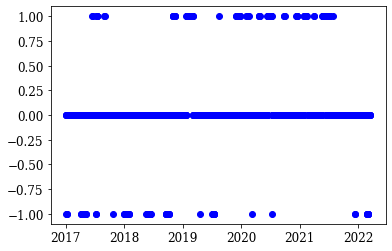

In [32]:
plt.plot(result.loc['000009'].label,'bo')

In [79]:
def ticekrToStr(job_sum):
    job_sum = job_sum[job_sum.ticker<700000]
    job_sum.loc[job_sum.ticker<10,'temp']='00000'
    job_sum.loc[(job_sum.ticker<100)&(job_sum.ticker>=10),'temp']='0000'
    job_sum.loc[(job_sum.ticker<1000)&(job_sum.ticker>=100),'temp']='000'
    job_sum.loc[(job_sum.ticker<10000)&(job_sum.ticker>=1000),'temp']='00'
    job_sum.loc[job_sum.temp==job_sum.temp,'ticker'] = job_sum[job_sum.temp==job_sum.temp]['temp']+job_sum[job_sum.temp==job_sum.temp]['ticker'].astype(str)
    del job_sum['temp']
    job_sum['ticker'] = job_sum['ticker'].astype(str)
    return job_sum

In [ ]:
result = result.reset_index()
result['Return'] = result['return'] * result['label']
result['label'] = np.sign(result['Return'])
result.loc[result['Return'] <=0, 'label'] = 0

In [43]:
result.label.value_counts()

0.0    1146
1.0     118
Name: label, dtype: int64

In [95]:
my_data = ticekrToStr(data)
my_data = my_data.merge(result, on=['ticker', 'tradeDate'], how='left')
my_data = my_data[~my_data.label.isnull()]
my_data 

,ticker,tradeDate,minute_new_FACTORS_CDPDP,minute_new_FACTORS_CDPP,minute_new_FACTORS_Down_beta,minute_new_FACTORS_ILLIQ,minute_new_FACTORS_IMI,minute_new_FACTORS_PVC,minute_new_FACTORS_TMA_turn,minute_new_FACTORS_TSMOM,...,alpha_5,alpha_9,alpha_31,openclose_pct1_rank,return,closePrice,TB,UB,LB,label
0,000009,2017-01-03,-1.67800,2.1700,0.0000,-0.6160,0.000000,2.168,0.5610,-0.5874,...,0.0000,0.0,0.00000,0.7960,NaN,10.46,2017-01-18 00:00:00,NaN,NaN,0.0
1,000009,2017-01-04,-1.75100,1.9310,0.0000,-0.6333,0.000000,1.867,0.6950,-1.0205,...,0.0000,0.0,0.00000,0.1862,0.018164,10.65,2017-01-19 00:00:00,NaN,NaN,0.0
2,000009,2017-01-05,0.03134,1.7720,0.0000,-0.6370,0.000000,1.693,0.7090,-0.9440,...,0.0000,0.0,0.00000,0.6360,-0.010329,10.54,2017-01-20 00:00:00,11.814137,9.265863,0.0
3,000009,2017-01-06,0.03049,1.5450,0.0000,-0.6210,0.000000,1.269,0.6973,-0.9307,...,0.0000,0.0,0.00000,0.6850,-0.002846,10.51,2017-01-23 00:00:00,11.416765,9.603235,1.0
4,000009,2017-01-09,0.02812,1.3160,0.0000,-0.6210,0.000000,1.144,0.6840,-0.8955,...,0.0000,0.0,0.00000,0.8490,0.005709,10.57,2017-01-24 00:00:00,11.313459,9.826541,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,000009,2022-03-11,0.00000,0.3005,-0.4077,-0.2588,0.480700,1.166,0.0000,-0.4797,...,0.5820,0.0,0.02559,0.3188,0.016793,12.11,2022-03-28 00:00:00,14.005885,10.214115,0.0
1261,000009,2022-03-14,0.00000,0.3118,-0.3877,-0.2747,0.186500,-1.605,0.0000,1.1280,...,0.3762,0.0,0.17540,0.3027,-0.041288,11.61,2022-03-29 00:00:00,13.477560,9.742440,0.0
1262,000009,2022-03-15,0.00000,-0.9750,-0.6590,-0.2820,0.236100,-1.955,0.0000,-1.2740,...,0.0587,0.0,0.35080,0.7944,-0.068045,10.82,2022-03-30 00:00:00,12.805814,8.834186,0.0
1263,000009,2022-03-16,0.00000,-1.1910,-0.1694,-0.2751,-0.006065,1.084,0.0000,-0.9340,...,-0.2000,0.0,0.53760,0.8804,0.056377,11.43,2022-03-31 00:00:00,13.883163,8.976837,0.0


In [96]:
f_x = pickle.load(open("pct1_cal/f_x_066", "rb"))
f_y = 'label'

dates = my_data.tradeDate.sort_values().unique()
epoch_ts = list(dates)

In [139]:
train_date = epoch_ts[:round(len(epoch_ts)*0.9)]
test_date = epoch_ts[round(len(epoch_ts)*0.9):]
len(train_date), len(test_date)

(1138, 127)

In [140]:
df_train = my_data[my_data.tradeDate.apply(lambda x: x in train_date)].reset_index(drop=True)
df_test = my_data[my_data.tradeDate.apply(lambda x: x in test_date)].reset_index(drop=True)
X_train = df_train[f_x]
y_train = df_train[f_y]
X_test = df_test[f_x]
y_test = df_test[f_y]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1138, 290), (1138,), (127, 290), (127,))

In [141]:
model = LogisticRegression( class_weight='balanced', warm_start=True, max_iter = 300,random_state=2020)
model.fit(X_train, y_train)

/workspace1/liufengyuan/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(class_weight='balanced', max_iter=300, random_state=2020,
                   warm_start=True)

0.9446397188049209
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96       926
         1.0       0.77      0.99      0.87       212

    accuracy                           0.94      1138
   macro avg       0.89      0.96      0.92      1138
weighted avg       0.96      0.94      0.95      1138

[[865  61]
 [  2 210]]


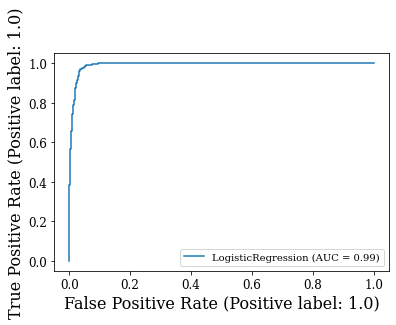

In [145]:
prediction_train = model.predict(X_train)
#print(prediction_train)
print(accuracy_score(y_train, prediction_train))
plot_roc_curve( model, X_train, y_train )
print( classification_report(y_train, prediction_train) )
print( confusion_matrix(y_train, prediction_train) )

In [147]:
y_score_train = model.predict_proba(X_train)[:,1]
thres = 0.3
prediction_high_recall_train = (y_score_train > thres).astype(int)
print( classification_report(y_train, prediction_high_recall_train))
print( confusion_matrix(y_train, prediction_high_recall_train))
meta_features_train = np.hstack((prediction_high_recall_train.reshape(-1,1),
                           X_train))
meta_labels_train = prediction_high_recall_train & y_train.astype(int)

              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93       926
         1.0       0.64      1.00      0.78       212

    accuracy                           0.89      1138
   macro avg       0.82      0.94      0.86      1138
weighted avg       0.93      0.89      0.90      1138

[[806 120]
 [  0 212]]


0.6062992125984252
              precision    recall  f1-score   support

         0.0       0.89      0.65      0.75       116
         1.0       0.05      0.18      0.07        11

    accuracy                           0.61       127
   macro avg       0.47      0.41      0.41       127
weighted avg       0.82      0.61      0.69       127

[[75 41]
 [ 9  2]]


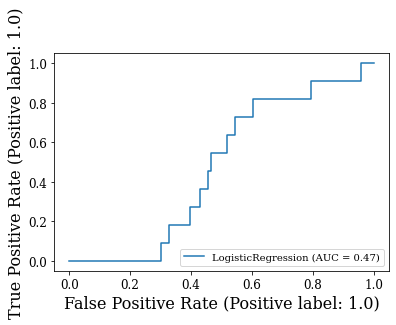

In [148]:
prediction_test = model.predict(X_test)
#print(prediction_test)
print(accuracy_score(y_test, prediction_test))
plot_roc_curve( model, X_test, y_test )
print( classification_report(y_test, prediction_test) )
print( confusion_matrix(y_test, prediction_test) )

In [149]:
y_score_test = model.predict_proba(X_test)[:,1]
thres = 0.3
prediction_high_recall_test = (y_score_test > thres).astype(int)
print( classification_report(y_test, prediction_high_recall_test))
print( confusion_matrix(y_test, prediction_high_recall_test))
meta_features_test = np.hstack((prediction_high_recall_test.reshape(-1,1),
                           X_test))
meta_labels_test = prediction_high_recall_test & y_test.astype(int)

              precision    recall  f1-score   support

         0.0       0.89      0.59      0.71       116
         1.0       0.06      0.27      0.10        11

    accuracy                           0.56       127
   macro avg       0.48      0.43      0.40       127
weighted avg       0.82      0.56      0.66       127

[[68 48]
 [ 8  3]]


In [157]:
meta_model = lgb.LGBMClassifier(n_estimators=300, learning_rate=0.09, num_leaves = 10, max_depth=5)
meta_model.fit(meta_features_train, meta_labels_train, \
    eval_set=[(meta_features_train, meta_labels_train),\
         (meta_features_test, meta_labels_test)], eval_metric='logloss')
meta_prediction_prob = meta_model.predict(meta_features_test)
meta_prediction = (meta_prediction_prob > thres).astype(int)
final_prediction = meta_prediction & prediction_high_recall_test

[1]	training's binary_logloss: 0.421219	valid_1's binary_logloss: 0.240456
[2]	training's binary_logloss: 0.378516	valid_1's binary_logloss: 0.23849
[3]	training's binary_logloss: 0.345118	valid_1's binary_logloss: 0.236382
[4]	training's binary_logloss: 0.316071	valid_1's binary_logloss: 0.245997
[5]	training's binary_logloss: 0.29046	valid_1's binary_logloss: 0.255883
[6]	training's binary_logloss: 0.26946	valid_1's binary_logloss: 0.256696
[7]	training's binary_logloss: 0.251299	valid_1's binary_logloss: 0.269349
[8]	training's binary_logloss: 0.235925	valid_1's binary_logloss: 0.270286
[9]	training's binary_logloss: 0.222545	valid_1's binary_logloss: 0.280757
[10]	training's binary_logloss: 0.210783	valid_1's binary_logloss: 0.292168
[11]	training's binary_logloss: 0.198161	valid_1's binary_logloss: 0.296519
[12]	training's binary_logloss: 0.186709	valid_1's binary_logloss: 0.310362
[13]	training's binary_logloss: 0.176956	valid_1's binary_logloss: 0.328512
[14]	training's binary_l

In [158]:
print(accuracy_score(y_test, final_prediction))
print( classification_report(y_test, final_prediction) )
print( confusion_matrix(y_test, final_prediction) )

0.6377952755905512
              precision    recall  f1-score   support

         0.0       0.91      0.67      0.77       116
         1.0       0.07      0.27      0.12        11

    accuracy                           0.64       127
   macro avg       0.49      0.47      0.44       127
weighted avg       0.83      0.64      0.72       127

[[78 38]
 [ 8  3]]
